In [86]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [87]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import mysql.connector 
import json
import collections

In [88]:
import talib

In [89]:
# Import My own library for factor testing
from SingleFactorTest import factorFilterFunctions as ff
#from config import *

In [90]:
%matplotlib inline
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [91]:
# {'600036':u'招商银行','002142':u'宁波银行','601939':u'建设银行','000709':u'河钢股份','000807':u'云铝股份','600111':u'北方稀土',
#  '002001':u'新和成','002562':u'兄弟科技','0300121':u'阳谷华泰','600352':u'浙江龙盛','600409':u'三友化工','000636':u'风华高科',
#  '000962':u'东方钽业','300228':u'富瑞特装'，'600681':u'百川能源','600789':u'鲁抗医药','002166':u'莱茵生物','002166':u'万华化学',
# '000933':u'神火股份','600977':u'中国电影','000802':u'北京文化','600809':u'山西汾酒','600438':u'通威股份','000970':u'中科三环'}

In [92]:
# 股票推荐字典
stkdict = {'20170815':['600036','002142','601939'], '20170814':['000709','000807','600111','002001','002562'],\
          '20170810':['300121','600352','600409'], '20170809':['000636','000962'], '20170808':['600803','300228','600681'],
          '20170807':['600789','002166','600309'],'20170803':['000933','600977','000802','600809'],
          '20170801':['600438'], '20170731':['600438','600111','000970']}

In [93]:
sortedstkdict = collections.OrderedDict(sorted(stkdict.items()))

In [94]:
fileNameClose = 'LZ_CN_STKA_QUOTE_TCLOSE.h5.csv'
fileNameOpen = 'LZ_CN_STKA_QUOTE_TOPEN.h5.csv'

In [95]:
path = ff.data_path
# Constants
startTime =  datetime.strptime('20170731', '%Y%m%d')
endTime = datetime.strptime('20170816', '%Y%m%d')

In [96]:
# 开盘价
openPrice= pd.read_csv(path+fileNameOpen,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]

stkList = map(lambda x: x.split('.')[0],openPrice.columns[1:])

openPrice = openPrice.iloc[:,:-1]

openPrice.columns = stkList 

In [97]:
# 收盘价
closePrice= pd.read_csv(path+fileNameClose,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]

stkList = map(lambda x: x.split('.')[0],closePrice.columns[1:])

closePrice = closePrice.iloc[:,:-1]

closePrice.columns = stkList

In [98]:
closePrice

,000005,600601,600602,600651,600652,600653,600654,600656,000004,000002,...,603535,300689,603458,300688,603602,300691,603721,601326,002892,603776
2017-07-31,4.94,3.87,7.16,9.12,9.86,3.26,13.48,NaN,22.31,23.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,4.96,3.86,7.22,8.95,10.03,3.26,13.48,NaN,22.36,23.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-02,4.93,3.84,7.00,8.87,10.27,3.26,13.48,NaN,21.85,23.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-03,4.94,3.83,7.70,9.04,10.21,3.26,13.48,NaN,22.22,23.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-04,4.9,3.84,7.72,8.93,9.76,3.26,13.48,NaN,21.88,22.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-07,4.89,3.85,7.62,8.95,9.82,3.26,13.48,NaN,22.00,22.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,4.88,3.86,7.59,8.88,9.78,3.26,13.48,NaN,21.91,22.77,...,21.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,4.88,3.86,7.57,8.89,9.75,3.26,13.48,NaN,22.17,22.95,...,24.02,20.72,42.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,4.83,3.80,7.87,8.69,9.58,3.26,13.48,NaN,21.80,22.80,...,26.42,22.79,46.51,15.48,21.86,NaN,NaN,NaN,NaN,NaN
2017-08-11,4.76,3.71,7.92,8.55,9.55,3.26,13.48,NaN,22.01,22.02,...,29.06,25.07,50.60,17.03,24.05,22.98,10.15,NaN,NaN,NaN


In [99]:
InitiCap = 100000  # 初始资金
capital = InitiCap  
feeRate = 0.0003  # 手续费+冲击成本
stampTaxRate = 0.001  # 印花税
buyList = []
availableCash = {}  # 每天的现金流量
# 生成购买的股票池
for key,item in sortedstkdict.iteritems():
    print key
    date = datetime.strptime(key, '%Y%m%d')
    totalCostToday = 0  # 当天买入的所有股票的成本
    for stk in item:        
        buyPrice = round(openPrice.loc[date][stk],2)
        amount = 100
        cost = round(buyPrice*amount*(1+feeRate),2)
        buyList.append([date,stk,buyPrice,amount,cost,1]) # 日期，股票代码，购买价格，购买数量，总cost,方向
        totalCostToday+= cost
    assert capital > totalCostToday
    capital  = capital  - totalCostToday
    availableCash[date] = capital  # 买入股票后剩下的资金

20170731
20170801
20170803
20170807
20170808
20170809
20170810
20170814
20170815


In [100]:
availableCash

{datetime.datetime(2017, 7, 31, 0, 0): 95882.77,
 datetime.datetime(2017, 8, 1, 0, 0): 95158.55,
 datetime.datetime(2017, 8, 3, 0, 0): 86145.85,
 datetime.datetime(2017, 8, 7, 0, 0): 80668.20000000001,
 datetime.datetime(2017, 8, 8, 0, 0): 76512.95000000001,
 datetime.datetime(2017, 8, 9, 0, 0): 74508.35,
 datetime.datetime(2017, 8, 10, 0, 0): 70507.15000000001,
 datetime.datetime(2017, 8, 14, 0, 0): 63355.00000000001,
 datetime.datetime(2017, 8, 15, 0, 0): 58697.61000000001}

In [101]:
dateList = sorted([datetime.strptime(key, '%Y%m%d') for key in stkdict.keys()])

dateList = closePrice.loc[dateList[0]:dateList[-1]].index

dateList

DatetimeIndex(['2017-07-31', '2017-08-01', '2017-08-02', '2017-08-03',
               '2017-08-04', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', freq=None)

In [102]:
availableCash 

{datetime.datetime(2017, 7, 31, 0, 0): 95882.77,
 datetime.datetime(2017, 8, 1, 0, 0): 95158.55,
 datetime.datetime(2017, 8, 3, 0, 0): 86145.85,
 datetime.datetime(2017, 8, 7, 0, 0): 80668.20000000001,
 datetime.datetime(2017, 8, 8, 0, 0): 76512.95000000001,
 datetime.datetime(2017, 8, 9, 0, 0): 74508.35,
 datetime.datetime(2017, 8, 10, 0, 0): 70507.15000000001,
 datetime.datetime(2017, 8, 14, 0, 0): 63355.00000000001,
 datetime.datetime(2017, 8, 15, 0, 0): 58697.61000000001}

In [103]:
availableCashSeries = pd.Series(index = dateList,data = availableCash )

availableCashSeries = availableCashSeries.ffill()

availableCashSeries

2017-07-31    95882.77
2017-08-01    95158.55
2017-08-02    95158.55
2017-08-03    86145.85
2017-08-04    86145.85
2017-08-07    80668.20
2017-08-08    76512.95
2017-08-09    74508.35
2017-08-10    70507.15
2017-08-11    70507.15
2017-08-14    63355.00
2017-08-15    58697.61
dtype: float64

In [104]:
availableCashSeries

2017-07-31    95882.77
2017-08-01    95158.55
2017-08-02    95158.55
2017-08-03    86145.85
2017-08-04    86145.85
2017-08-07    80668.20
2017-08-08    76512.95
2017-08-09    74508.35
2017-08-10    70507.15
2017-08-11    70507.15
2017-08-14    63355.00
2017-08-15    58697.61
dtype: float64

In [105]:
buyList

[[datetime.datetime(2017, 7, 31, 0, 0), '600438', 6.5, 100, 650.19, 1],
 [datetime.datetime(2017, 7, 31, 0, 0), '600111', 17.1, 100, 1710.51, 1],
 [datetime.datetime(2017, 7, 31, 0, 0), '000970', 17.56, 100, 1756.53, 1],
 [datetime.datetime(2017, 8, 1, 0, 0), '600438', 7.24, 100, 724.22, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '000933', 11.71, 100, 1171.35, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '600977', 18.08, 100, 1808.54, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '000802', 19.07, 100, 1907.57, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '600809', 41.24, 100, 4125.24, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '600789', 8.95, 100, 895.27, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '002166', 11.5, 100, 1150.35, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '600309', 34.31, 100, 3432.03, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '600803', 13.91, 100, 1391.42, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '300228', 11.18, 100, 1118.34, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '6006

In [106]:
# 简单回测
cutwinthreshold = 0.05
cutlossthreshold  = -0.05
pnldict = {}
sellList = []
for tradeitem in buyList:
    pnl = (closePrice.loc[tradeitem[0]:][tradeitem[1]] - tradeitem[2]) / tradeitem[2]  # 计算每天的pnl
    cutwin = pnl[pnl >= cutwinthreshold]
    cutloss = pnl[pnl <= cutlossthreshold]
    if len(cutwin) > 0:    # 如果达到止盈线，则按当天收盘价止盈
        pnldict[tradeitem[1]] = round(cutwin .iloc[0],2)
        selldate = cutwin.index[0]
        sellPrice = closePrice.loc[selldate][tradeitem[1]]
        cost = round(sellPrice*tradeitem[3]*(1-stampTaxRate),2)
        sellList.append([selldate,tradeitem[1],round(sellPrice,2),tradeitem[3],cost,-1]) # 卖出list的格式与买入相同
        availableCashSeries.loc[selldate:]+= cost   # 记录到资金账户里
    elif  len(cutloss) > 0:     #  反之则止损
        pnldict[tradeitem[1]] = round(cutloss .iloc[0],2)
        selldate = cutloss.index[0]
        sellPrice = closePrice.loc[selldate][tradeitem[1]]
        cost = round(sellPrice*tradeitem[3]*(1-stampTaxRate),2)
        sellList.append([selldate,tradeitem[1],round(sellPrice,2),tradeitem[3],cost,-1]) # 卖出list的格式与买入相同
        availableCashSeries.loc[selldate:]+= cost 
    else:                                   # 没有达到止盈止损线的情况下，按照倒数第二天的收盘价计算pnl
        pnldict[tradeitem[1]] = round(pnl.iloc[-2],2)

In [107]:
sellList

[[Timestamp('2017-07-31 00:00:00'), '600438', 7.11, 100, 710.29, -1],
 [Timestamp('2017-07-31 00:00:00'), '600111', 18.61, 100, 1859.14, -1],
 [Timestamp('2017-08-09 00:00:00'), '000970', 18.78, 100, 1876.12, -1],
 [Timestamp('2017-08-04 00:00:00'), '000933', 12.35, 100, 1233.77, -1],
 [Timestamp('2017-08-04 00:00:00'), '000802', 20.74, 100, 2071.93, -1],
 [Timestamp('2017-08-07 00:00:00'), '600809', 43.99, 100, 4394.6, -1],
 [Timestamp('2017-08-09 00:00:00'), '600789', 9.43, 100, 942.06, -1],
 [Timestamp('2017-08-08 00:00:00'), '002166', 12.11, 100, 1209.79, -1],
 [Timestamp('2017-08-11 00:00:00'), '600309', 31.44, 100, 3140.86, -1],
 [Timestamp('2017-08-14 00:00:00'), '600803', 14.84, 100, 1482.52, -1],
 [Timestamp('2017-08-10 00:00:00'), '000636', 9.51, 100, 950.05, -1],
 [Timestamp('2017-08-14 00:00:00'), '000962', 10.54, 100, 1052.95, -1],
 [Timestamp('2017-08-11 00:00:00'), '300121', 14.75, 100, 1473.53, -1],
 [Timestamp('2017-08-11 00:00:00'), '600352', 10.51, 100, 1049.95, -1],

In [108]:
holdingList = list(set([i[1] for i in buyList]) - set([i[1] for i in sellList]))

In [109]:
holdingList

['000807',
 '600681',
 '600036',
 '000709',
 '002001',
 '600977',
 '002142',
 '601939',
 '300228']

In [110]:
selldatepair = {i[1]:i[0] for i in buyList if i[1] in holdingList}
selldatepair

{'000709': datetime.datetime(2017, 8, 14, 0, 0),
 '000807': datetime.datetime(2017, 8, 14, 0, 0),
 '002001': datetime.datetime(2017, 8, 14, 0, 0),
 '002142': datetime.datetime(2017, 8, 15, 0, 0),
 '300228': datetime.datetime(2017, 8, 8, 0, 0),
 '600036': datetime.datetime(2017, 8, 15, 0, 0),
 '600681': datetime.datetime(2017, 8, 8, 0, 0),
 '600977': datetime.datetime(2017, 8, 3, 0, 0),
 '601939': datetime.datetime(2017, 8, 15, 0, 0)}

In [111]:
tempo = closePrice[holdingList]

In [112]:
position = tempo.copy()
for stk,date in selldatepair.iteritems():
    filterCondition = tempo[tempo[stk].index >= date]
    falseCondition= tempo[tempo[stk].index  < date]
    position.loc[filterCondition.index,stk]= 100
    position.loc[falseCondition.index,stk]=  0
position

,000807,600681,600036,000709,002001,600977,002142,601939,300228
2017-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-03,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
2017-08-04,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
2017-08-07,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
2017-08-08,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0
2017-08-09,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0
2017-08-10,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0
2017-08-11,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0


In [113]:
marketValue = position*tempo

In [114]:
marketValue.sum(axis=1)+availableCashSeries

2017-07-31     98452.20
2017-08-01     97727.98
2017-08-02     97727.98
2017-08-03     90568.28
2017-08-04     93836.98
2017-08-07     92755.93
2017-08-08     92554.47
2017-08-09     93353.05
2017-08-10     90225.90
2017-08-11     97028.05
2017-08-14     98265.37
2017-08-15    100142.28
2017-08-16          NaN
dtype: float64

In [115]:
# 计算卖出时得到的资金
for sellitem in sellList:
    availableCashSeries.loc[sellitem[0]]+= sellitem[-2]
availableCashSeries

2017-07-31    101021.63
2017-08-01     97727.98
2017-08-02     97727.98
2017-08-03     88715.28
2017-08-04     95326.68
2017-08-07     95332.53
2017-08-08     89202.26
2017-08-09     91624.23
2017-08-10     86704.95
2017-08-11     99459.20
2017-08-14     94521.84
2017-08-15     88723.58
dtype: float64

In [116]:
# 合并买卖订单
tradingList = buyList + sellList
tradingCode = list(set([i[1] for i in buyList]) | set([i[1] for i in sellList]))

In [117]:
tradingList

[[datetime.datetime(2017, 7, 31, 0, 0), '600438', 6.5, 100, 650.19, 1],
 [datetime.datetime(2017, 7, 31, 0, 0), '600111', 17.1, 100, 1710.51, 1],
 [datetime.datetime(2017, 7, 31, 0, 0), '000970', 17.56, 100, 1756.53, 1],
 [datetime.datetime(2017, 8, 1, 0, 0), '600438', 7.24, 100, 724.22, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '000933', 11.71, 100, 1171.35, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '600977', 18.08, 100, 1808.54, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '000802', 19.07, 100, 1907.57, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '600809', 41.24, 100, 4125.24, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '600789', 8.95, 100, 895.27, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '002166', 11.5, 100, 1150.35, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '600309', 34.31, 100, 3432.03, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '600803', 13.91, 100, 1391.42, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '300228', 11.18, 100, 1118.34, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '6006

In [118]:
# 创建tradingsheet
tradingSheet = pd.DataFrame(index = dateList, columns = tradingCode, data=0, dtype = float)

for item in tradingList:
    tradingSheet .loc[item[0],item[1]]+= item[-1] * item[-3]
positionchangeDF = tradingSheet .cumsum().ffill()

In [119]:
tradingSheet 

,600309,000807,600681,000802,000933,600036,000709,002001,600977,600809,...,300121,000970,000636,600352,002562,600409,600789,600803,600438,600111
2017-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2017-08-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-03,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,100.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-04,0.0,0.0,0.0,-100.0,-100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-07,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
2017-08-08,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
2017-08-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-100.0,100.0,0.0,0.0,0.0,-100.0,0.0,0.0,0.0
2017-08-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,0.0,-100.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0
2017-08-11,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-100.0,0.0,0.0,-100.0,0.0,-100.0,0.0,0.0,0.0,0.0


In [120]:
positionchangeDF

,600309,000807,600681,000802,000933,600036,000709,002001,600977,600809,...,300121,000970,000636,600352,002562,600409,600789,600803,600438,600111
2017-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2017-08-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2017-08-03,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,100.0,100.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2017-08-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2017-08-07,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,0.0
2017-08-08,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0
2017-08-09,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0
2017-08-10,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,100.0,0.0,0.0,100.0,0.0,100.0,0.0,100.0,100.0,0.0
2017-08-11,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0


In [121]:
# 总资产
totalCapital= (positionchangeDF * closePrice[positionchangeDF.columns]).sum(axis=1)+ availableCashSeries

In [122]:
totalCapital

2017-07-31    102851.63
2017-08-01    100220.98
2017-08-02    100169.98
2017-08-03    100238.28
2017-08-04    103575.68
2017-08-07    105161.53
2017-08-08    102026.26
2017-08-09    103794.23
2017-08-10    101743.95
2017-08-11    107070.20
2017-08-14    105125.84
2017-08-15    102556.58
2017-08-16          NaN
dtype: float64

In [123]:
# 年化收益率
annualizedRet = ((totalCapital.iloc[-2] - InitiCap)/ InitiCap +1)**(250/(len(totalCapital)-1)) -1

In [124]:
annualizedRet 

0.69202537164493205

In [125]:
availableCashSeries

2017-07-31    101021.63
2017-08-01     97727.98
2017-08-02     97727.98
2017-08-03     88715.28
2017-08-04     95326.68
2017-08-07     95332.53
2017-08-08     89202.26
2017-08-09     91624.23
2017-08-10     86704.95
2017-08-11     99459.20
2017-08-14     94521.84
2017-08-15     88723.58
dtype: float64

In [126]:
pnlseries = pd.Series(pnldict)

In [127]:
pnlseries.describe()

count    25.000000
mean      0.018400
std       0.053126
min      -0.080000
25%      -0.010000
50%       0.030000
75%       0.060000
max       0.090000
dtype: float64

(array([ 3.,  2.,  0.,  0.,  4.,  2.,  3.,  4.,  5.,  2.]),
 array([-0.08 , -0.063, -0.046, -0.029, -0.012,  0.005,  0.022,  0.039,
         0.056,  0.073,  0.09 ]),
 <a list of 10 Patch objects>)

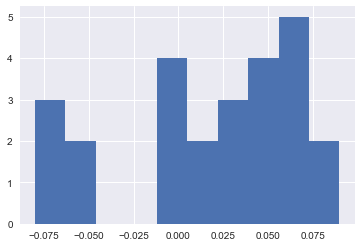

In [128]:
plt.hist(pnlseries)

In [129]:
#-----------------------------------------------------CTA Backtest Engine------------------------------------

In [130]:
def getNewMatrix(inputArray, t, m):
    newMatrix = []
    n = t-m+1
    for i in range(n):
        newdata = list(inputArray[i:m+i])
        newMatrix.append(newdata)
    #newMatrix = np.array(newMatrix).reshape(n,m)
    return np.array(newMatrix)

def recreateArray(newMatrix,t,m):
    ret = []
    n = t - m + 1
    for p in range(1, t+1):
        if p < m:
            alpha = p
        elif p > t-m+1:
            alpha = t-p+1
        else:
            alpha = m
        sigma = 0
        for j in range(1, m+1):
            i = p - j + 1
            if i > 0 and i < n+1:
                sigma += newMatrix[i-1][j-1]
        ret.append(sigma/alpha)
    return np.array(ret)

def getSVD(inputArray,t,m):
    #print 1
    inputmatrix = getNewMatrix(inputArray, t, m)
    u, s, v = np.linalg.svd(inputmatrix)
    eviNum = 1 if s[0]/s.sum() > 0.99 else 2
    sNew = np.zeros((eviNum, eviNum))
    np.fill_diagonal(sNew, s[:eviNum])
    matrixForts = np.dot(np.dot(u[:, :eviNum].reshape(u.shape[0], eviNum), sNew), v[:eviNum])
    #print matrixForts.shape
    newts = recreateArray(matrixForts, t, m)
    return newts

In [438]:
old_path = 'C:/Users/LZJF_02/Desktop/original_data/'
new_path = 'C:/Users/LZJF_02/Desktop/modified_data/'
filename = 'rb000_1min.csv'
#newname = 'j9000_1min_modi.csv'

In [444]:
startTime =  datetime.strptime('20161010', '%Y%m%d') # 上涨趋势
endTime = datetime.strptime('20161107', '%Y%m%d')

startTrainTime = datetime.strptime('20150530', '%Y%m%d') 
endTimeTrain =  datetime.strptime('20160530', '%Y%m%d')

startTimeVal = datetime.strptime('20151016', '%Y%m%d')  # 下跌趋势
endTimeVal = datetime.strptime('20151123', '%Y%m%d')

startTimeSurge =  datetime.strptime('20170606', '%Y%m%d') # 上涨趋势
endTimeSurge = datetime.strptime('20170809', '%Y%m%d')

startTimePlunge =  datetime.strptime('20170906', '%Y%m%d') # 下跌趋势
endTimePlunge = datetime.strptime('20170929', '%Y%m%d')

In [133]:
# svd滤波参数
shapeNum = 30
svdShort = 7
svdLong = 20

In [134]:
# 期货合约相关参数
Leverage = 10
Slipage = 2
ContractSize = 10
IniCapital = 100000
FeeRate = 0.003
PriceTick = 1

In [440]:
data = pd.read_csv(old_path+filename,infer_datetime_format=True,header=None,names = ['Open', 'High', 'Low', 'Close','TotalVolume','OpenInterest'])
data.index = data.index.map(lambda x : pd.to_datetime(x))

In [441]:
data['OpenRatio'] = (data['OpenInterest'] - data['OpenInterest'].shift(1)) / data['TotalVolume']

In [137]:
data.loc[startTime:].describe()
data.loc[startTime:].quantile(0.85)

Open            3.386000e+03
High            3.389000e+03
Low             3.383000e+03
Close           3.386000e+03
TotalVolume     2.788540e+04
OpenInterest    4.839281e+06
OpenRatio       1.819540e-01
Name: 0.85, dtype: float64

In [442]:
data.tail(20)

,Open,High,Low,Close,TotalVolume,OpenInterest,OpenRatio
2017-09-18 11:16:00,3786,3789,3770,3776,56594,4057618,0.105559
2017-09-18 11:17:00,3775,3779,3771,3771,25718,4061640,0.156389
2017-09-18 11:18:00,3771,3780,3771,3776,15230,4065086,0.226264
2017-09-18 11:19:00,3776,3777,3772,3773,9056,4066862,0.196113
2017-09-18 11:20:00,3773,3773,3764,3766,38662,4072204,0.138172
2017-09-18 11:21:00,3767,3770,3766,3768,15876,4075438,0.203704
2017-09-18 11:22:00,3767,3768,3764,3764,18014,4077740,0.127789
2017-09-18 11:23:00,3763,3765,3759,3763,32302,4083090,0.165624
2017-09-18 11:24:00,3762,3768,3760,3768,15844,4085922,0.178743
2017-09-18 11:25:00,3769,3769,3762,3762,12436,4087190,0.101962


In [138]:
data.describe()

,Open,High,Low,Close,TotalVolume,OpenInterest,OpenRatio
count,559424.000000,559424.000000,559424.000000,559424.000000,559424.000000,5.594240e+05,559423.000000
mean,3264.047300,3265.418556,3262.656613,3264.046666,11405.277618,2.374608e+06,-0.004413
std,959.305203,959.450165,959.158927,959.303869,14949.837188,1.251182e+06,0.225740
min,1617.000000,1618.000000,1616.000000,1617.000000,2.000000,8.376000e+03,-1.638679
25%,2407.000000,2408.000000,2405.000000,2407.000000,2482.000000,1.320980e+06,-0.132770
50%,3345.000000,3347.000000,3343.000000,3345.000000,6682.000000,2.372697e+06,0.003532
75%,4090.000000,4091.000000,4089.000000,4090.000000,14478.000000,3.422413e+06,0.133420
max,5186.000000,5187.000000,5182.000000,5185.000000,583962.000000,5.762684e+06,1.000000


In [310]:
# 默认空值
EMPTY_STRING = ''
EMPTY_UNICODE = u''
EMPTY_INT = 0
EMPTY_FLOAT = 0.0
class BarData(object):
    def __init__(self):
        self.open = EMPTY_FLOAT             # OHLC
        self.high = EMPTY_FLOAT
        self.low = EMPTY_FLOAT
        self.close = EMPTY_FLOAT
        self.openRatio = EMPTY_FLOAT       # 开仓指标
        
        self.date = EMPTY_STRING            # bar开始的时间，日期
        self.time = EMPTY_STRING            # 时间
        self.datetime = None                # python的datetime时间对象
        
        self.volume = EMPTY_INT             # 成交量
        self.openInterest = EMPTY_INT       # 持仓量 

In [538]:
dataIndice = data.loc[startTimeSurge:endTimeSurge]
indexby5MIN = filter(lambda x : x.minute % 5 ==0, dataIndice.index)

# modify data by customized method
#dataIndice = data.loc[startTime:]
resultList = []
for index, time in enumerate(indexby5MIN):
    if index < len(indexby5MIN) - 1:
        tempdata = dataIndice.loc[time:indexby5MIN [index+1]].iloc[:-1]
        resultdict = {}
        resultdict['Open'] = tempdata['Open'].values[0]
        resultdict['High'] = tempdata['High'].max()
        resultdict['Low'] = tempdata['Low'].min()
        resultdict['Close'] = tempdata['Close'].values[-1]
        resultdict['TotalVolume'] = tempdata['TotalVolume'].sum()
        resultdict['OpenInterest'] = tempdata['OpenInterest'].values[-1]
        resultdict['OpenRatio'] = tempdata['OpenRatio'].values[-1]
        resultdict['OpenRatioModi'] = (np.sqrt(tempdata['TotalVolume']) * tempdata['OpenRatio'] / \
                                       (np.sqrt(tempdata['TotalVolume']).sum())).mean()
        resultdict['time'] = time
        resultList.append(resultdict)
df = pd.DataFrame(resultList,columns = ['Open','High','Low','Close','TotalVolume','OpenInterest','OpenRatio','time','OpenRatioModi'])  

dataClean = df.set_index('time')
dataClean['pnl'] = dataClean['Close'].pct_change()
dataClean['nextpnl'] = dataClean['pnl'].shift(1)

In [446]:
dataClean.describe()

,Open,High,Low,Close,TotalVolume,OpenInterest,OpenRatio,OpenRatioModi,pnl,nextpnl
count,3171.000000,3171.000000,3171.000000,3171.000000,3.171000e+03,3.171000e+03,3171.000000,3171.000000,3170.000000,3169.000000
mean,3357.800694,3362.613056,3353.180385,3358.086093,1.128805e+05,5.139076e+06,0.019778,0.002965,0.000098,0.000098
std,285.327727,285.770489,284.815376,285.373775,8.213829e+04,3.536161e+05,0.147034,0.018434,0.002195,0.002195
min,2899.000000,2904.000000,2896.000000,2898.000000,1.432800e+04,4.321780e+06,-0.544438,-0.082963,-0.014327,-0.014327
25%,3078.000000,3082.000000,3073.000000,3078.000000,5.873500e+04,4.881539e+06,-0.073298,-0.007404,-0.000899,-0.000899
50%,3389.000000,3394.000000,3383.000000,3389.000000,8.985600e+04,5.056540e+06,0.023282,0.003953,0.000000,0.000000
75%,3557.000000,3563.500000,3552.000000,3557.000000,1.418110e+05,5.498674e+06,0.116975,0.015436,0.001186,0.001184
max,4046.000000,4053.000000,4031.000000,4047.000000,1.083054e+06,6.036610e+06,0.505254,0.057268,0.043041,0.043041


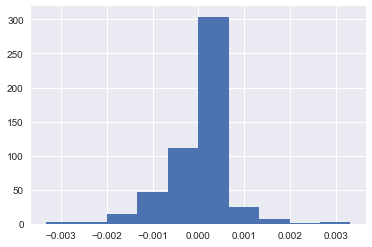

In [411]:
dataClean[dataClean['OpenRatioModi'] > 0.023]['nextpnl'].hist()

In [414]:
dataClean['pnl'].mean()

-3.4642519774314726e-05

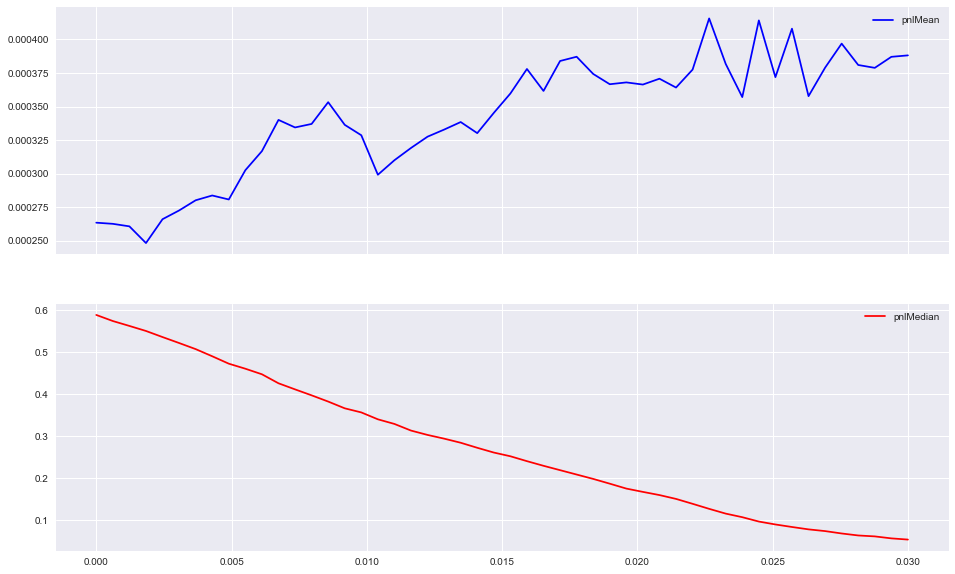

In [539]:
# check the monotonity of pnl filtered by openRatio indicator in bullish market
variation = []
bullpnlMeanList = []
bullpnlMedianList = []
x_axis = np.linspace(0,0.03,50)
for i in x_axis:
    variation.append(i)
    bullpnlMeanList.append(dataClean[dataClean['OpenRatioModi'] >= i]['pnl'].mean())
    bullpnlMedianList.append(dataClean[dataClean['OpenRatioModi'] >= i]['pnl'].shape[0] / dataClean.shape[0])
fig, (ax1,ax2) = plt.subplots(nrows=2,sharex=True,figsize=(16,10))
ax1.plot(x_axis,bullpnlMeanList,'blue',label='pnlMean')
ax2.plot(x_axis,bullpnlMedianList,'red',label='pnlMedian')
ax1.legend()
ax2.legend()

新指标做多阈值大概为0.02(0.85左右的分位数)，做空为0.024(0.8的分位数),也可取（0.85的分位数0.0275）

In [534]:
np.sqrt(np.array([1,2,3,4]))/np.sqrt(np.array([1,2,3,4])).sum()

array([ 0.16270045,  0.23009319,  0.28180545,  0.32540091])

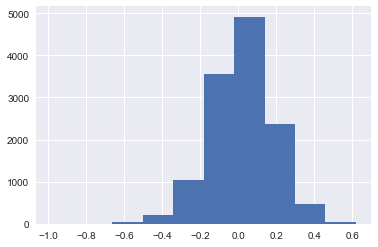

In [366]:
dataClean['OpenRatio'].hist()

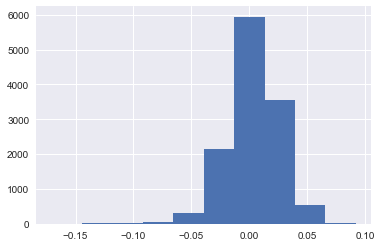

In [368]:
dataClean['OpenRatioModi'].hist()

In [363]:
a,b,c = 10000,3000,7000
print np.sqrt(a) / (np.sqrt(a)+np.sqrt(b)+np.sqrt(c))
print np.sqrt(b) / (np.sqrt(a)+np.sqrt(b)+np.sqrt(c))
print np.sqrt(c) / (np.sqrt(a)+np.sqrt(b)+np.sqrt(c))

0.419395782663
0.229712530687
0.350891686651


In [360]:
print 3/(1+2+3)
print 1/(1+2+3)
print 2/(1+2+3)

0.5
0.166666666667
0.333333333333


In [361]:
print np.log10(a) / (np.log10(a)+np.log10(b)+np.log10(c))
print np.log10(b) / (np.log10(a)+np.log10(b)+np.log10(c))
print np.log10(c) / (np.log10(a)+np.log10(b)+np.log10(c))

0.353287628147
0.307105980215
0.339606391638


In [362]:
print np.log(a) / (np.log(a)+np.log(b)+np.log(c))
print np.log(b) / (np.log(a)+np.log(b)+np.log(c))
print np.log(c) / (np.log(a)+np.log(b)+np.log(c))

0.353287628147
0.307105980215
0.339606391638


In [312]:
# modify data by customized method
dataIndice = data.loc[startTime:]
for index, row in dataIndice.iterrows():
    if (index.datetime.minute+1) % 5 ==0:
        if fiveBar:
            fiveBar = fiveBar
            fiveBar.high = max(fiveBar.high, row['High'])
            fiveBar.low = min(fiveBar.low, row['Low'])
            fiveBar.close = row['Close']
            fiveBar.open = row['Open']
            fiveBar.volume+= row['Volume']
            fiveBar.openInterest = row['OpenInterest']
            fiveBar.openRatio = row['OpenRatio']
            # your rule to clean data
            fiveBar = None
    else:
        if not fiveBar:
            fiveBar = BarData()
            fiveBar.high = row['High']
            fiveBar.low =  row['Low']
            fiveBar.open = row['Open']
            fiveBar.close = row['Close']
            fiveBar.volume= row['Volume']
            fiveBar.openInterest = row['OpenInterest']
            fiveBar.openRatio = row['OpenRatio']
            
            fiveBar.date = index.date
            fiveBar.time = index.time
            fiveBar.datetime = index.datetime
        else:
            fiveBar = fiveBar
            fiveBar.high = max(fiveBar.high,row['High'])
            fiveBar.low = min(fiveBar.low, row['Low'])
            fiveBar.close = row['Close']
            fiveBar.open = row['Open']
            fiveBar.volume+= row['Volume']
            fiveBar.openInterest = row['OpenInterest']
            fiveBar.openRatio = row['OpenRatio']

Open            3.410000e+03
High            3.411000e+03
Low             3.402000e+03
Close           3.404000e+03
TotalVolume     5.669000e+04
OpenInterest    5.658558e+06
OpenRatio      -1.209737e-01
Name: 2017-07-10 14:50:00, dtype: float64
Open            3.404000e+03
High            3.407000e+03
Low             3.404000e+03
Close           3.405000e+03
TotalVolume     2.262200e+04
OpenInterest    5.657888e+06
OpenRatio      -2.961719e-02
Name: 2017-07-10 14:51:00, dtype: float64
Open            3.405000e+03
High            3.409000e+03
Low             3.404000e+03
Close           3.407000e+03
TotalVolume     2.082200e+04
OpenInterest    5.660318e+06
OpenRatio       1.167035e-01
Name: 2017-07-10 14:52:00, dtype: float64
Open            3.407000e+03
High            3.407000e+03
Low             3.405000e+03
Close           3.405000e+03
TotalVolume     1.410600e+04
OpenInterest    5.657840e+06
OpenRatio      -1.756699e-01
Name: 2017-07-10 14:53:00, dtype: float64
Open            3.40

In [140]:
c = data.loc[startTime:].groupby(pd.TimeGrouper(freq='5Min'))

In [141]:
nlarge = c['TotalVolume'].nlargest()

In [142]:
nlarge.iloc[:50]

2016-10-10 09:00:00  2016-10-10 09:00:00    152124
                     2016-10-10 09:03:00     58238
                     2016-10-10 09:01:00     56340
                     2016-10-10 09:02:00     46010
                     2016-10-10 09:04:00     27602
2016-10-10 09:05:00  2016-10-10 09:08:00     93250
                     2016-10-10 09:09:00     86728
                     2016-10-10 09:07:00     56208
                     2016-10-10 09:05:00     36690
                     2016-10-10 09:06:00     34316
2016-10-10 09:10:00  2016-10-10 09:10:00    126300
                     2016-10-10 09:11:00     67616
                     2016-10-10 09:12:00     39392
                     2016-10-10 09:14:00     27860
                     2016-10-10 09:13:00     27846
2016-10-10 09:15:00  2016-10-10 09:15:00     48790
                     2016-10-10 09:18:00     29964
                     2016-10-10 09:16:00     26416
                     2016-10-10 09:19:00     18350
                     2016-10-10

In [143]:
# Rescale openratio by the rank of Volume corresponding trading minute. e.g.Weighing the Open ratio by the order of total volume.
a = c['TotalVolume'].rank()/15 * data['OpenRatio']  
dataslice = data.loc[a.index]
dataslice['ModiOR'] = a
dataslice.groupby(pd.TimeGrouper(freq='5Min'))['OpenRatio'].mean().dropna().describe()

count    111908.000000
mean         -0.004438
std           0.142197
min          -0.962924
25%          -0.080584
50%           0.005290
75%           0.083825
max           0.770955
Name: OpenRatio, dtype: float64

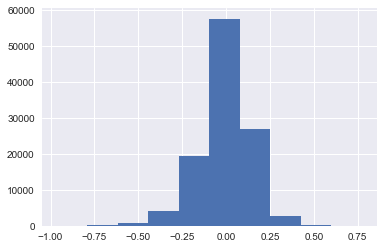

In [144]:
dataslice.groupby(pd.TimeGrouper(freq='5Min'))['OpenRatio'].mean().dropna().hist()

In [145]:
dataModi = dataslice.groupby(pd.TimeGrouper(freq='5Min'))['OpenRatio'].mean().dropna()
dataModi.quantile(0.85)

0.12698134357627083

In [451]:
def resample_data(data,period='5Min'):
    # 将一分钟线聚合为5分钟线
    databy5min = pd.DataFrame()
    groupgenerator = data.groupby(pd.TimeGrouper(freq=period))
    databy5min['Open'] = groupgenerator['Open'].first()
    databy5min['High'] = groupgenerator['High'].max()
    databy5min['Low'] = groupgenerator['Low'].min()
    databy5min['Close'] = groupgenerator['Close'].last()
    databy5min['TotalVolume'] = groupgenerator['TotalVolume'].sum()
    databy5min['OpenInterest'] = groupgenerator['OpenInterest'].last()
    databy5min.dropna(axis=0,inplace = True)
    return databy5min

In [452]:
dfResampled = resample_data(data)

In [453]:
dfResampled['OpenRatio'] = (dfResampled['OpenInterest'] - dfResampled['OpenInterest'].shift(1)) / dfResampled['TotalVolume']
dfResampled['WeightedOpenRatio'] = (dfResampled['OpenInterest'] - dfResampled['OpenInterest'].shift(1)) / np.sqrt(dfResampled['TotalVolume'])
dfResampled['pnl'] = dfResampled['Close'].pct_change()

In [454]:
sampleSurge= dfResampled.loc[startTimeSurge:endTimeSurge]
sampleSurge['nextpnl'] = sampleSurge['pnl'].shift(-1)

c:\python27\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [455]:
sampleSurge

,Open,High,Low,Close,TotalVolume,OpenInterest,OpenRatio,WeightedOpenRatio,pnl,nextpnl
2017-06-06 09:00:00,2905.0,2912.0,2901.0,2910.0,149516.0,5106840.0,-0.032558,-12.589449,0.003794,0.000344
2017-06-06 09:05:00,2910.0,2918.0,2910.0,2911.0,156324.0,5105254.0,-0.010146,-4.011348,0.000344,-0.001718
2017-06-06 09:10:00,2912.0,2912.0,2905.0,2906.0,82338.0,5102344.0,-0.035342,-10.141281,-0.001718,0.003097
2017-06-06 09:15:00,2906.0,2917.0,2906.0,2915.0,85270.0,5108550.0,0.072781,21.252677,0.003097,0.000343
2017-06-06 09:20:00,2916.0,2922.0,2912.0,2916.0,129160.0,5109646.0,0.008486,3.049626,0.000343,-0.000686
2017-06-06 09:25:00,2916.0,2917.0,2912.0,2914.0,45494.0,5109714.0,0.001495,0.318810,-0.000686,-0.002059
2017-06-06 09:30:00,2914.0,2914.0,2907.0,2908.0,67542.0,5107228.0,-0.036807,-9.565643,-0.002059,0.002407
2017-06-06 09:35:00,2909.0,2917.0,2908.0,2915.0,44616.0,5115958.0,0.195670,41.330335,0.002407,0.000343
2017-06-06 09:40:00,2915.0,2920.0,2915.0,2916.0,84156.0,5118780.0,0.033533,9.727796,0.000343,0.002743
2017-06-06 09:45:00,2916.0,2925.0,2916.0,2924.0,131376.0,5104672.0,-0.107386,-38.923101,0.002743,-0.001368


In [456]:
samplePlunge = dfResampled.loc[startTimePlunge:endTimePlunge]
samplePlunge['nextpnl'] = samplePlunge['pnl'].shift(-1)

c:\python27\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


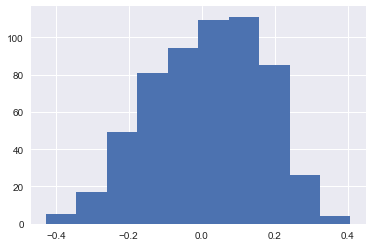

In [457]:
samplePlunge['OpenRatio'].hist()

In [458]:
sampleSurge['nextpnl'].describe()

count    3172.000000
mean        0.000099
std         0.002195
min        -0.014327
25%        -0.000899
50%         0.000000
75%         0.001187
max         0.043041
Name: nextpnl, dtype: float64

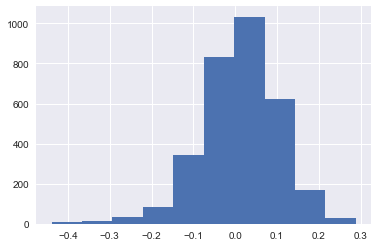

In [459]:
sampleSurge['OpenRatio'].hist()

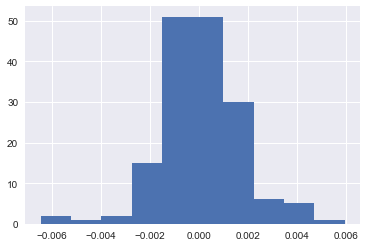

In [460]:
sampleSurge[sampleSurge['OpenRatio'] > .15]['nextpnl'].hist()

In [461]:
sampleSurge[sampleSurge['OpenRatio'] > 0.03]['nextpnl'].describe()

count    1353.000000
mean        0.000102
std         0.001910
min        -0.014327
25%        -0.000851
50%         0.000000
75%         0.001120
max         0.010653
Name: nextpnl, dtype: float64

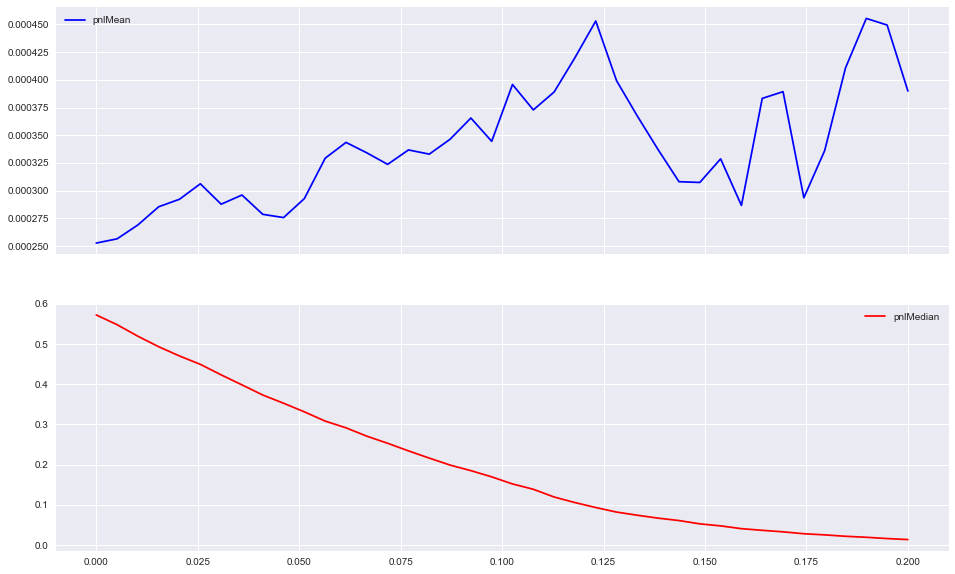

In [509]:
# check the monotonity of pnl filtered by openRatio indicator in bullish market
variation = []
bullpnlMeanList = []
bullpnlMedianList = []
for i in np.linspace(0,0.2,40):
    variation.append(i)
    bullpnlMeanList.append(sampleSurge[sampleSurge['OpenRatio'] >= i]['pnl'].mean())
    bullpnlMedianList.append(sampleSurge[sampleSurge['OpenRatio'] >= i].shape[0] / sampleSurge.shape[0])
fig, (ax1,ax2) = plt.subplots(nrows=2,sharex=True,figsize=(16,10))
ax1.plot(np.linspace(0,0.2,40),bullpnlMeanList,'blue',label='pnlMean')
ax2.plot(np.linspace(0,0.2,40),bullpnlMedianList,'red',label='pnlMedian')
ax1.legend()
ax2.legend()

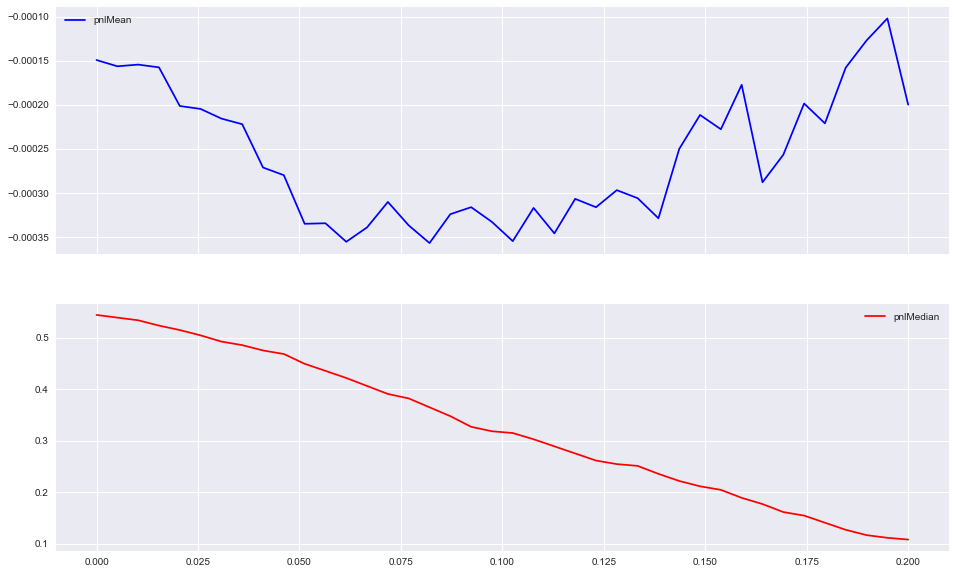

In [521]:
# check the monotonity of pnl filtered by openRatio indicator in bearrih market
variation = []
bearpnlMeanList = []
bearpnlMedianList = []
for i in np.linspace(0,0.2,40):
    variation.append(i)
    bearpnlMeanList.append(samplePlunge[samplePlunge['OpenRatio'] >= i]['nextpnl'].mean())
    bearpnlMedianList.append(samplePlunge[samplePlunge['OpenRatio'] >= i].shape[0] / samplePlunge.shape[0])
fig, (ax1,ax2) = plt.subplots(nrows=2,sharex=True,figsize=(16,10))
ax1.plot(np.linspace(0,0.2,40),bearpnlMeanList,'blue',label='pnlMean')
ax2.plot(np.linspace(0,0.2,40),bearpnlMedianList,'red',label='pnlMedian')
ax1.legend()
ax2.legend()

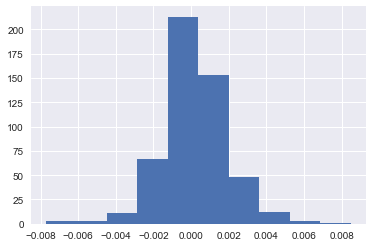

In [464]:
sampleSurge[sampleSurge['OpenRatio'] >= 0.1]['nextpnl'].hist()

In [465]:
pnlMedianList

[0.0,
 0.00018348623853214896,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0003759398496241406,
 0.0003783579265985715,
 0.00039110013600951454,
 0.0003850596842509546,
 0.00039110013600951454,
 0.0003850596842509546,
 0.00037714888811135605,
 0.00037714888811135605,
 0.0003759398496241406,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00039022439956792887,
 0.00018917896329928574,
 0.00018917896329928574,
 0.0003783579265985715,
 0.000756715853197143]

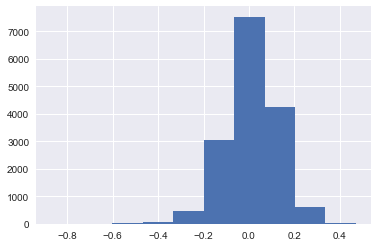

In [466]:
dfResampled['OpenRatio'].loc[startTime:].hist()

In [467]:
dfResampled['WeightedOpenRatio'].quantile(0.996)

79.68028445583764

In [468]:
dfResampled[dfResampled['OpenRatio'] > 0].mean()

Open                 3.291324e+03
High                 3.294579e+03
Low                  3.288058e+03
Close                3.291373e+03
TotalVolume          6.048672e+04
OpenInterest         2.462370e+06
OpenRatio            9.922565e-02
WeightedOpenRatio    1.951315e+01
pnl                  1.064776e-05
dtype: float64

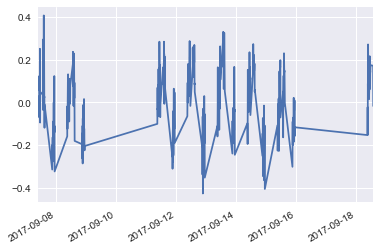

In [469]:
dfResampled['OpenRatio'].tail(500).plot()

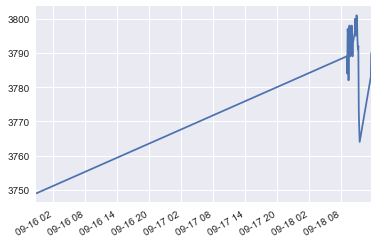

In [470]:
dfResampled['Close'].tail(30).plot()

In [471]:
dfResampled[['pnl','OpenRatio']].tail(50)

,pnl,OpenRatio
2017-09-15 21:15:00,0.001318,-0.200097
2017-09-15 21:20:00,0.000527,-0.118360
2017-09-15 21:25:00,0.001316,-0.138428
2017-09-15 21:30:00,-0.000526,-0.134287
2017-09-15 21:35:00,-0.002104,-0.071214
2017-09-15 21:40:00,0.001054,-0.139200
2017-09-15 21:45:00,-0.001579,-0.110066
2017-09-15 21:50:00,0.000264,-0.076724
2017-09-15 21:55:00,-0.003690,-0.015670
2017-09-15 22:00:00,0.001323,0.021464


In [472]:
len(dfResampled[dfResampled['OpenRatio'] < 0.15]) / len(dfResampled)

0.8898059683376394

In [473]:
len(dfResampled[dfResampled['OpenRatio'] < 0]) / len(dfResampled)

0.49196303167970035

In [474]:
np.sqrt(0.33*225/5)

3.8535697735995385

In [475]:
datatrain = dfResampled.loc[startTrainTime:endTimeTrain]

In [476]:
startTime

datetime.datetime(2016, 10, 10, 0, 0)

In [477]:
datatrain['EMAOpenRatio'] = talib.EMA(datatrain['OpenRatio'].values, timeperiod=4)

datatrain['EMAOpenRatio'].describe()

c:\python27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


count    21861.000000
mean        -0.020017
std          0.098425
min         -0.780899
25%         -0.059019
50%         -0.007955
75%          0.037176
max          0.351774
Name: EMAOpenRatio, dtype: float64

In [478]:
datatrain['OpenRatio'].describe()

count    21864.000000
mean        -0.020038
std          0.148480
min         -0.977303
25%         -0.084961
50%         -0.004827
75%          0.065936
max          0.598691
Name: OpenRatio, dtype: float64

In [479]:
datatrain['EMAOpenRatio'].quantile(0.92)

0.08891263599053176

In [480]:
datatrain['OpenRatio'].quantile(0.9)

0.13565806714586204

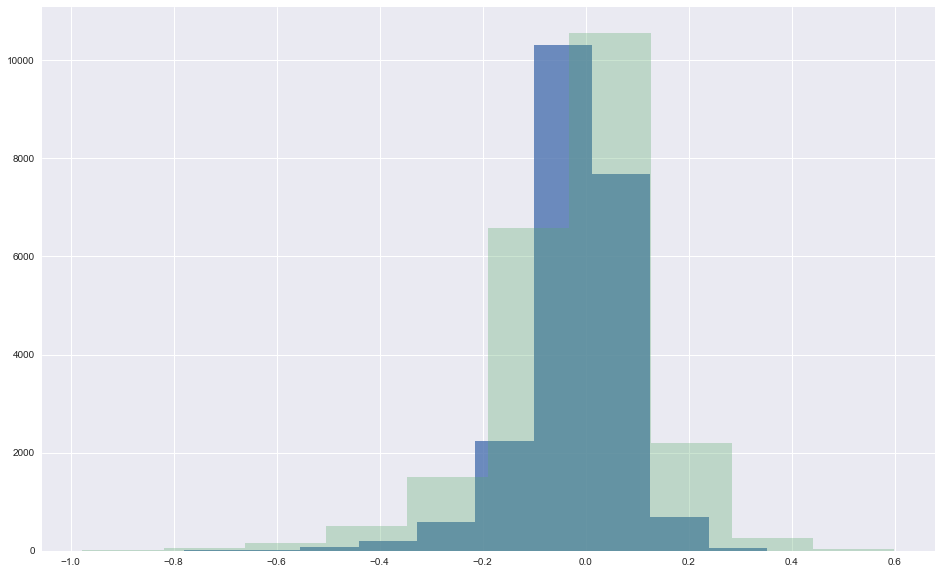

In [481]:
# show size distribution(quantile plot)
fig = plt.figure(figsize=(16,10))
# Add a subplot
ax = fig.add_subplot(111)
datatrain['EMAOpenRatio'].hist(alpha =0.8)
datatrain['OpenRatio'].hist(alpha = 0.3)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=25)

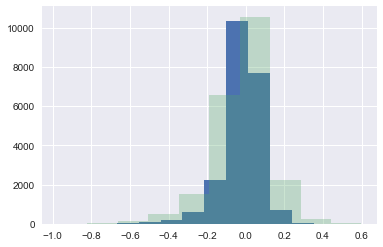

In [482]:
datatrain['EMAOpenRatio'].hist()
datatrain['OpenRatio'].hist(alpha = 0.3)

In [483]:
datatrain['OpenRatio'].describe()

count    21864.000000
mean        -0.020038
std          0.148480
min         -0.977303
25%         -0.084961
50%         -0.004827
75%          0.065936
max          0.598691
Name: OpenRatio, dtype: float64

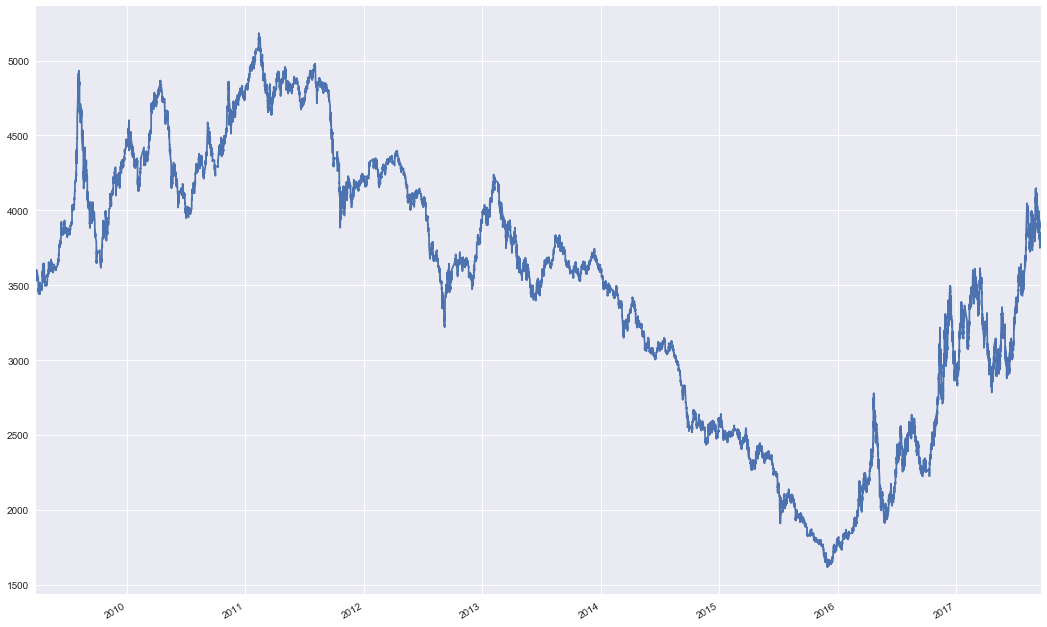

In [484]:
dfResampled['Close'].plot(figsize=(18,12))

In [485]:
shapeNum = 20

In [486]:
svdindicator = getSVD(datatrain['Close'].values[-shapeNum:], shapeNum, svdShort)

In [487]:
svdindicator1 = getSVD(datatrain['Close'].values[-shapeNum:], shapeNum, svdLong)
svdindicator1

array([ 2021.        ,  1012.        ,   671.        ,   504.25      ,
         403.2       ,   335.        ,   288.14285714,   252.625     ,
         224.88888889,   202.1       ,   184.45454545,   168.75      ,
         155.92307692,   145.14285714,   135.46666667,   126.375     ,
         118.88235294,   112.5       ,   106.63157895,  2027.        ])

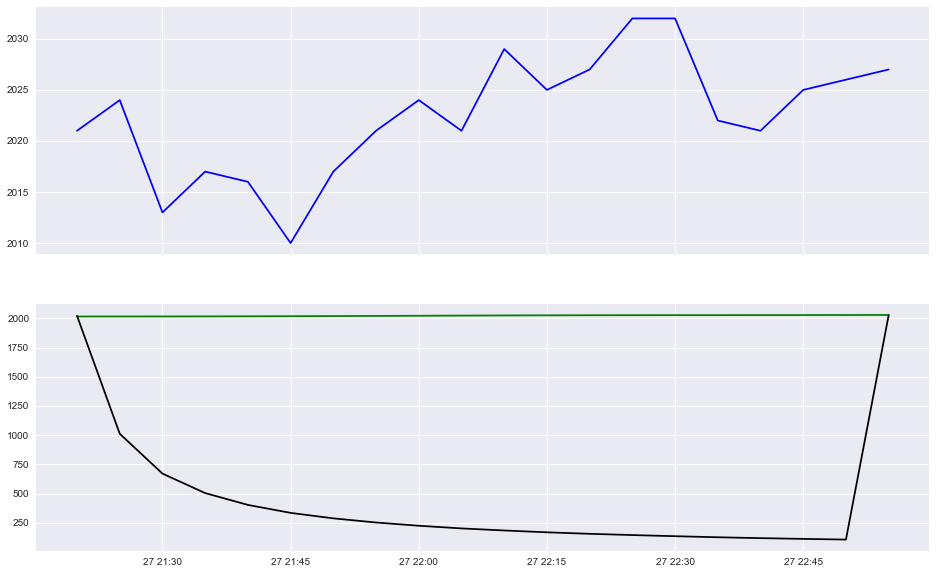

In [488]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,figsize=(16,10))
ax1.plot(datatrain.index[-shapeNum:],datatrain['Close'].values[-shapeNum:],'blue',label='Close')
ax2.plot(datatrain.index[-shapeNum:],svdindicator,'green',)
ax2.plot(datatrain.index[-shapeNum:],svdindicator1,'black')
#ax1.title('SVD')

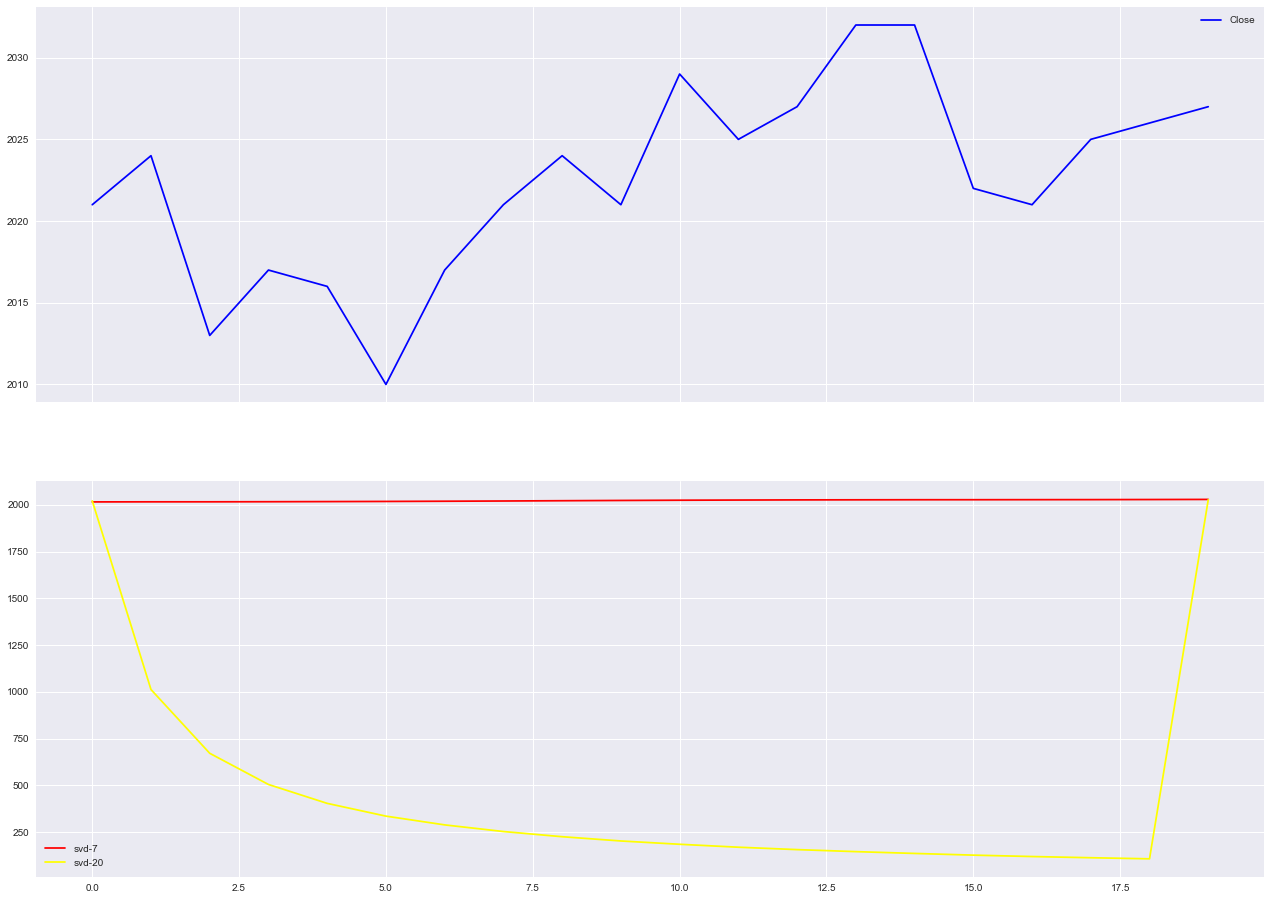

In [489]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,figsize=(22,16))
ax1.plot(datatrain['Close'].values[-shapeNum:],'blue',label='Close')
ax2.plot(svdindicator,'red',label='svd-'+str(svdShort))
ax2.plot(svdindicator1,'yellow',label='svd-'+str(svdLong))
#ax1.title('SVD')
ax1.legend()
ax2.legend()

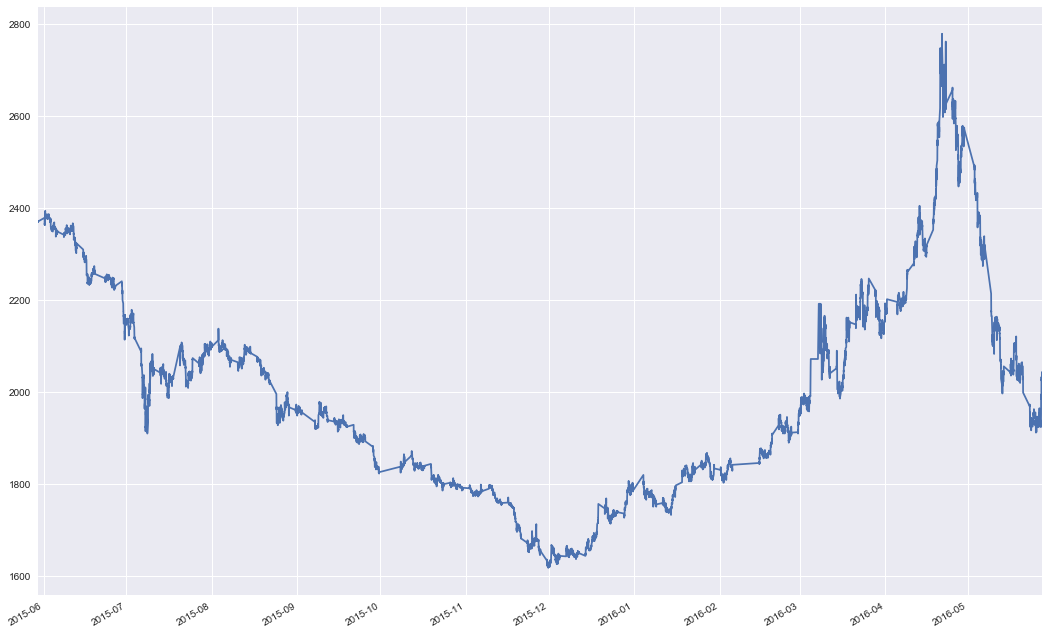

In [490]:
datatrain['Close'].plot(figsize=(18,12))

In [491]:
#kvol.median()

In [492]:
kvol = (datatrain['Close'] - datatrain['Close'].shift(1)).rolling(min_periods=60,window=60,center=False).std()

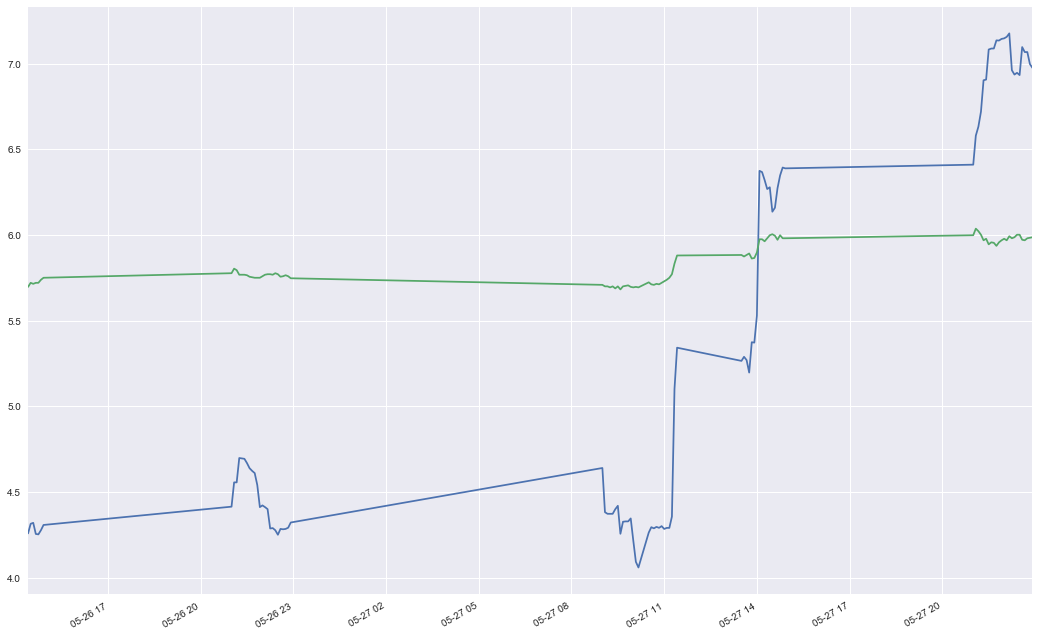

In [493]:
kvol.iloc[-100:].plot(figsize=(18,12))
((7*datatrain['Close']/datatrain['Close'].iloc[0]).iloc[-100:]).plot(sharex=True)

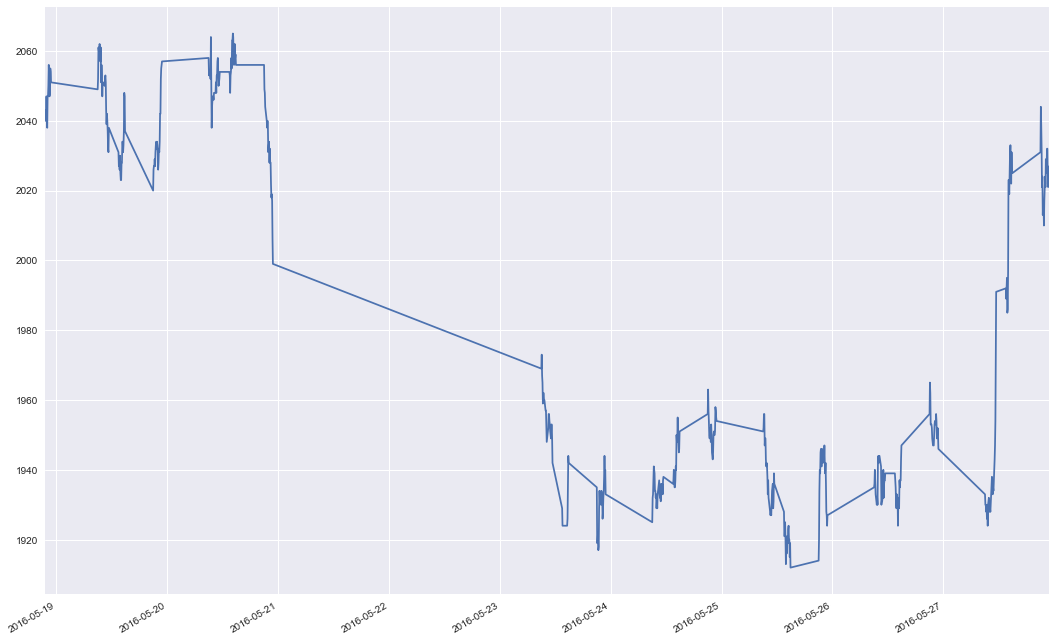

In [494]:
datatrain['Close'].iloc[-500:].plot(figsize=(18,12))

In [495]:
datatrain['Impact'] = (datatrain['Close'] - datatrain['Open']) / datatrain['TotalVolume']   

c:\python27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


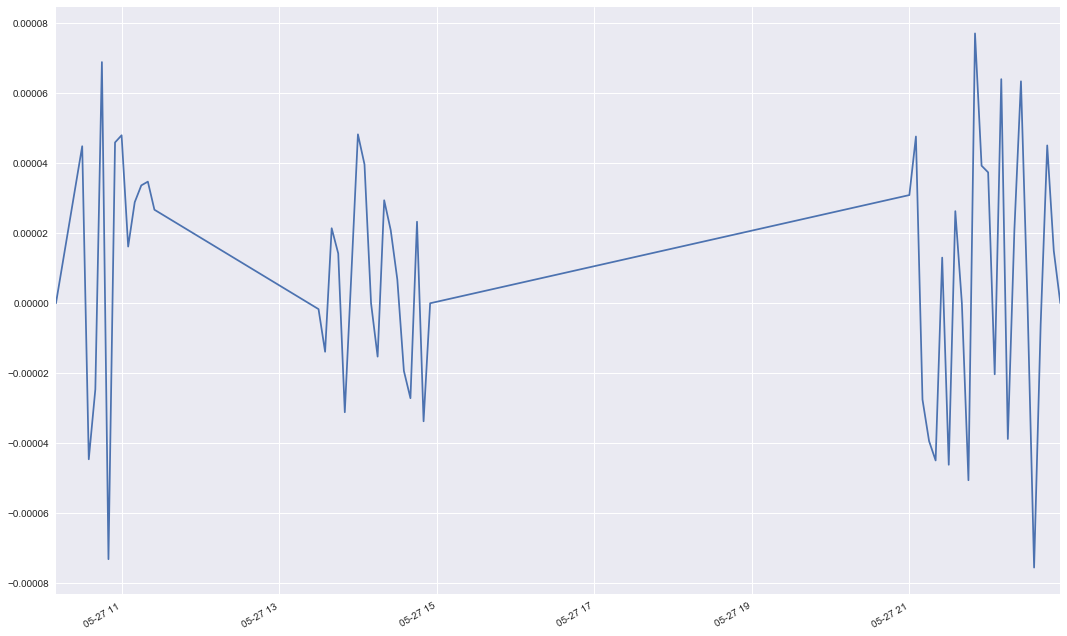

In [496]:
datatrain['Impact'].iloc[-55:].plot(figsize=(18,12))

In [497]:
datatrain['TotalVolume'].iloc[-55:].mean()

205968.8

In [498]:
datatrain[datatrain['Impact']>0]

,Open,High,Low,Close,TotalVolume,OpenInterest,OpenRatio,WeightedOpenRatio,pnl,EMAOpenRatio,Impact
2015-05-30 00:25:00,2370.0,2371.0,2370.0,2371.0,3400.0,2955256.0,-0.321765,-18.761945,0.000422,-0.209114,0.000294
2015-05-30 00:50:00,2370.0,2371.0,2370.0,2371.0,3358.0,2952400.0,-0.219774,-12.735500,0.000000,-0.202789,0.000298
2015-06-01 09:00:00,2373.0,2381.0,2372.0,2379.0,184520.0,2955278.0,0.044797,19.243040,0.003374,-0.205728,0.000033
2015-06-01 09:15:00,2373.0,2375.0,2373.0,2374.0,57766.0,2962076.0,-0.049302,-11.849604,0.000421,-0.035716,0.000017
2015-06-01 09:35:00,2368.0,2370.0,2367.0,2370.0,31126.0,2985654.0,0.141361,24.939688,0.000845,0.092440,0.000064
2015-06-01 09:45:00,2367.0,2369.0,2367.0,2369.0,29286.0,2987464.0,0.110838,18.967867,0.000422,0.068931,0.000068
2015-06-01 09:50:00,2368.0,2370.0,2367.0,2369.0,22614.0,2990954.0,0.154329,23.207947,0.000000,0.103090,0.000044
2015-06-01 09:55:00,2369.0,2371.0,2366.0,2370.0,37006.0,2985446.0,-0.148841,-28.632407,0.000422,0.002318,0.000027
2015-06-01 10:30:00,2364.0,2367.0,2362.0,2367.0,50810.0,2979830.0,0.081756,18.428581,0.001269,-0.006068,0.000059
2015-06-01 11:10:00,2362.0,2368.0,2359.0,2367.0,105036.0,2977774.0,-0.040139,-13.008629,0.001693,-0.021021,0.000048


In [499]:
filtered = datatrain[(datatrain['TotalVolume']<datatrain['TotalVolume'].quantile(0.2)) & (datatrain['Impact']>((datatrain[datatrain['Impact']>0]['Impact']).quantile(0.7)))]

In [500]:
filtered

,Open,High,Low,Close,TotalVolume,OpenInterest,OpenRatio,WeightedOpenRatio,pnl,EMAOpenRatio,Impact
2015-05-30 00:25:00,2370.0,2371.0,2370.0,2371.0,3400.0,2955256.0,-0.321765,-18.761945,0.000422,-0.209114,0.000294
2015-05-30 00:50:00,2370.0,2371.0,2370.0,2371.0,3358.0,2952400.0,-0.219774,-12.735500,0.000000,-0.202789,0.000298
2015-06-01 22:35:00,2384.0,2385.0,2384.0,2385.0,4550.0,2992066.0,-0.214945,-14.498837,0.000000,-0.107620,0.000220
2015-06-01 23:20:00,2381.0,2382.0,2381.0,2382.0,10896.0,2983310.0,-0.251468,-26.249257,0.000420,-0.132103,0.000092
2015-06-01 23:30:00,2380.0,2381.0,2380.0,2381.0,12968.0,2982658.0,-0.101326,-11.538753,0.000420,-0.073059,0.000077
2015-06-01 23:35:00,2381.0,2382.0,2381.0,2382.0,3146.0,2983578.0,0.292435,16.402440,0.000420,0.073138,0.000318
2015-06-02 00:00:00,2381.0,2382.0,2380.0,2382.0,3832.0,2981788.0,-0.358559,-22.195963,0.000420,-0.062563,0.000261
2015-06-02 00:40:00,2381.0,2382.0,2380.0,2382.0,6498.0,2977296.0,-0.179132,-14.439865,0.000420,-0.230158,0.000154
2015-06-02 00:50:00,2382.0,2383.0,2381.0,2383.0,3080.0,2975972.0,-0.609740,-33.839211,0.000420,-0.232589,0.000325
2015-06-02 09:50:00,2378.0,2379.0,2377.0,2379.0,13802.0,2955198.0,-0.247211,-29.042768,0.000421,-0.130552,0.000072


In [501]:
datatrain.iloc[:2]

,Open,High,Low,Close,TotalVolume,OpenInterest,OpenRatio,WeightedOpenRatio,pnl,EMAOpenRatio,Impact
2015-05-30 00:00:00,2370.0,2371.0,2370.0,2370.0,1664.0,2959782.0,-0.180288,-7.354355,0.000000,NaN,0.0
2015-05-30 00:05:00,2371.0,2371.0,2370.0,2371.0,4826.0,2958464.0,-0.273104,-18.972377,0.000422,NaN,0.0


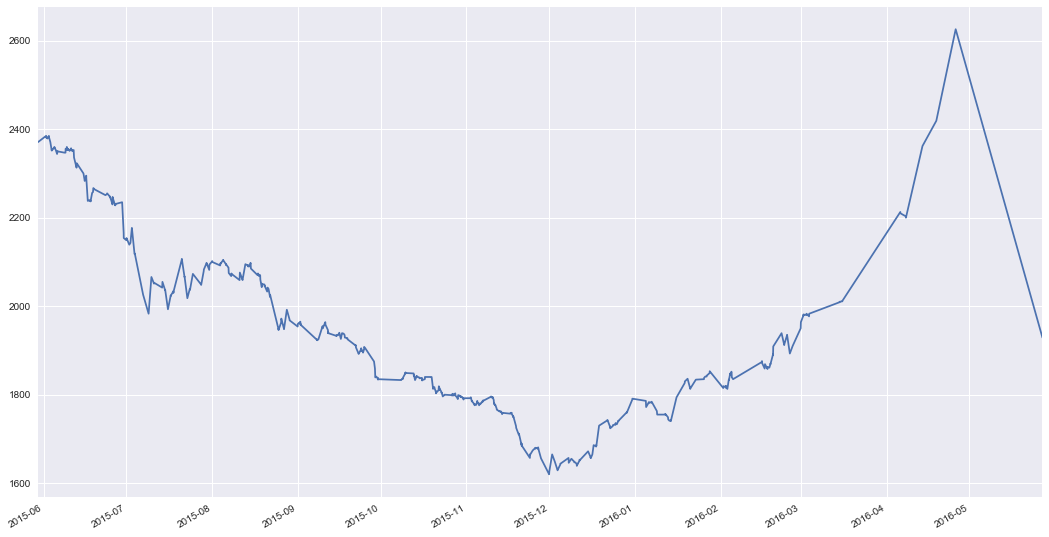

In [502]:
filtered['Close'].plot(figsize=(18,10))

In [503]:
trackBackPeriod = 50
code = 'rb000' 
initialNum = 100

In [504]:
futurebuyList = []
for i in range(initialNum,len(datatrain)-1):
    svdshortArray = getSVD(datatrain['Close'].values[i+1-trackBackPeriod:i+1], trackBackPeriod, svdShort)
    svdlongArray = getSVD(datatrain['Close'].values[i+1-trackBackPeriod:i+1], trackBackPeriod, svdLong)
    if svdshortArray[-2] < svdlongArray[-2] and svdshortArray[-1] > svdlongArray[-1]:
        dfslice = datatrain.iloc[i+1]
        amount = 1
        price = dfslice['Open']
        cost = price * amount
        direction = 1
        futurebuyList.append([dfslice.name,code,price,amount,cost,direction])

In [505]:
futurebuyList

[[Timestamp('2015-06-02 10:40:00'), 'rb000', 2380.0, 1, 2380.0, 1],
 [Timestamp('2015-06-02 14:30:00'), 'rb000', 2378.0, 1, 2378.0, 1],
 [Timestamp('2015-06-03 00:30:00'), 'rb000', 2381.0, 1, 2381.0, 1],
 [Timestamp('2015-06-03 10:40:00'), 'rb000', 2372.0, 1, 2372.0, 1],
 [Timestamp('2015-06-04 22:45:00'), 'rb000', 2359.0, 1, 2359.0, 1],
 [Timestamp('2015-06-08 10:10:00'), 'rb000', 2342.0, 1, 2342.0, 1],
 [Timestamp('2015-06-08 22:05:00'), 'rb000', 2347.0, 1, 2347.0, 1],
 [Timestamp('2015-06-08 23:10:00'), 'rb000', 2348.0, 1, 2348.0, 1],
 [Timestamp('2015-06-09 21:15:00'), 'rb000', 2352.0, 1, 2352.0, 1],
 [Timestamp('2015-06-10 00:40:00'), 'rb000', 2355.0, 1, 2355.0, 1],
 [Timestamp('2015-06-10 10:45:00'), 'rb000', 2350.0, 1, 2350.0, 1],
 [Timestamp('2015-06-11 00:35:00'), 'rb000', 2355.0, 1, 2355.0, 1],
 [Timestamp('2015-06-11 10:55:00'), 'rb000', 2350.0, 1, 2350.0, 1],
 [Timestamp('2015-06-12 13:35:00'), 'rb000', 2324.0, 1, 2324.0, 1],
 [Timestamp('2015-06-12 14:25:00'), 'rb000', 231